<center>
<img src="https://2223moodle.isel.pt/pluginfile.php/1/theme_adaptable/logo/1631635830/logo-isel_inv3.png" width="250">
<h3>Licenciatura em Engenharia Informática e Multimédia</h3><br>
<br>
<h2>Aprendizagem Automática (AA)</h3>
<h3>2º Trabalho Laboratorial – Classificação de Críticas de Cinema do IMDb </h3>
<br>

<br>
Trabalho Realizado por:<br>
Gonçalo Silva <b>A48328</b><br>
Diogo Lobo <b>A48168</b><br>
Turma 52D<br><br>
Docente: Gonçalo Xufre <br>
<br>
9 de Dezembro de 2024
</center>


In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as aggClus
from scipy.cluster.hierarchy import dendrogram

In [46]:
import itertools

def plotMatriz(modelo,xtest,ytest,string):
    y_pred = modelo.predict(xtest)
    print(classification_report(ytest, y_pred))
    plt.figure(figsize=(6,6))
    sns.heatmap(confusion_matrix(ytest, y_pred),annot=True,fmt='g')
    plt.title(string)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [47]:
D = pickle.load(open('imdbFull.p','rb'))

In [48]:
Docs = D.data
y = D.target
print()
descr = D.DESCR
# print(descr)
# print(len(Docs))
# print(len(y))
# print(y)
unique_values, counts = np.unique(y, return_counts=True)

# Display the counts
print("Counts of each value in y:")
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")


Counts of each value in y:
Value: 1, Count: 10122
Value: 2, Count: 4586
Value: 3, Count: 4961
Value: 4, Count: 5331
Value: 7, Count: 4803
Value: 8, Count: 5859
Value: 9, Count: 4607
Value: 10, Count: 9731


In [49]:
# from nltk.stem import PorterStemmer,SnowballStemmer,LancasterStemmer

# porterStemFunc = PorterStemmer()
# Docs_PorterStem = [' '.join([porterStemFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_PorterStem,open('docsPorterStem.p','wb'))

# snowballSteamFunc = SnowballStemmer('english')
# Docs_SnowballStem = [' '.join([snowballSteamFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_SnowballStem,open('docsSnowballStem.p','wb'))

# lancasterStemFunc = LancasterStemmer()
# Docs_LancasterStem = [' '.join([lancasterStemFunc.stem(word) for word in doc.split()]) for doc in Docs]
# pickle.dump(Docs_PorterStem,open('docsLancasterStem.p','wb'))

# print(Docs_PorterStem[0])
# print(Docs_SnowballStem[0])
# print(Docs_LancasterStem[0])



In [50]:
DocsPorterStem = pickle.load(open('docsPorterStem.p','rb'))
DocsSnowballStem = pickle.load(open('docsSnowballStem.p','rb'))
DocsLancasterStem = pickle.load(open('docslancasterStem.p','rb'))

print(DocsPorterStem[0])
print(DocsSnowballStem[0])
print(DocsLancasterStem[0])

zero day lead you to think, even re-think whi two boys/young men would do what they did - commit mutual suicid via slaughter their classmates. it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own/mutu world via coupl destruction.<br /><br />it is not a perfect movi but given what money/tim the filmmak and actor had - it is a remark product. in term of explain the motiv and action of the two young suicide/murder it is better than 'elephant' - in term of be a film that get under our 'rationalistic' skin it is a far, far better film than almost anyth you are like to see. <br /><br />flaw but honest with a terribl honesty.
zero day lead you to think, even re-think whi two boys/young men would do what they did - commit mutual suicid via slaughter their classmates. it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own/mutu worl

In [51]:
print(DocsLancasterStem[0])
Docs =[re.sub(r'[^a-z-A-Z\u00c0-\u00FF]+',' ',doc)for doc in Docs]
print(Docs[0])
# Tfidf = TfidfVectorizer(ngram_range=(1,2),min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
Tfidf = TfidfVectorizer(min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
X = Tfidf.transform(Docs)

zero day lead you to think, even re-think whi two boys/young men would do what they did - commit mutual suicid via slaughter their classmates. it captur what must be beyond a bizarr mode of be for two human who have decid to withdraw from common civil in order to defin their own/mutu world via coupl destruction.<br /><br />it is not a perfect movi but given what money/tim the filmmak and actor had - it is a remark product. in term of explain the motiv and action of the two young suicide/murder it is better than 'elephant' - in term of be a film that get under our 'rationalistic' skin it is a far, far better film than almost anyth you are like to see. <br /><br />flaw but honest with a terribl honesty.
Zero Day leads you to think even re-think why two boys young men would do what they did - commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define the

In [52]:
DocsTrain, DocsTest, ytrain, ytest = train_test_split(X,y,test_size=0.50,shuffle=False,random_state=18)
DocsValTrain, DocsValTest, yValTrain, yValTest = train_test_split(DocsTrain,ytrain,test_size=0.2,random_state=18,shuffle=False)

--- 

## Logistic Regression

In [53]:
LogReg = LogisticRegression(penalty='l2',C=1,max_iter=1000,tol=0.0001,solver='lbfgs',random_state=18)
LogReg.fit(DocsValTrain,yValTrain)
print(LogReg.score(DocsValTrain,yValTrain))
print(LogReg.score(DocsValTest,yValTest))

0.7026
0.431


              precision    recall  f1-score   support

           1       0.53      0.86      0.66      1018
           2       0.32      0.07      0.11       454
           3       0.32      0.13      0.19       481
           4       0.41      0.37      0.39       539
           7       0.35      0.25      0.29       525
           8       0.28      0.26      0.27       618
           9       0.19      0.04      0.07       441
          10       0.44      0.73      0.55       924

    accuracy                           0.43      5000
   macro avg       0.36      0.34      0.32      5000
weighted avg       0.38      0.43      0.38      5000



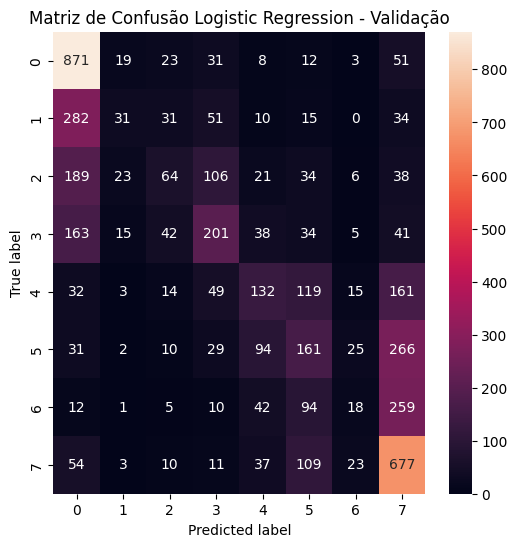

In [54]:
plotMatriz(LogReg,DocsValTest,yValTest,'Matriz de Confusão Logistic Regression - Validação')

In [55]:
LogReg.fit(DocsTrain,ytrain)
print(LogReg.score(DocsTrain,ytrain))
print(LogReg.score(DocsTest,ytest))

0.68884
0.426


              precision    recall  f1-score   support

           1       0.53      0.83      0.64      5022
           2       0.20      0.05      0.09      2302
           3       0.27      0.12      0.17      2541
           4       0.32      0.33      0.33      2635
           7       0.32      0.24      0.28      2307
           8       0.27      0.24      0.25      2850
           9       0.22      0.04      0.07      2344
          10       0.49      0.77      0.60      4999

    accuracy                           0.43     25000
   macro avg       0.33      0.33      0.30     25000
weighted avg       0.36      0.43      0.37     25000



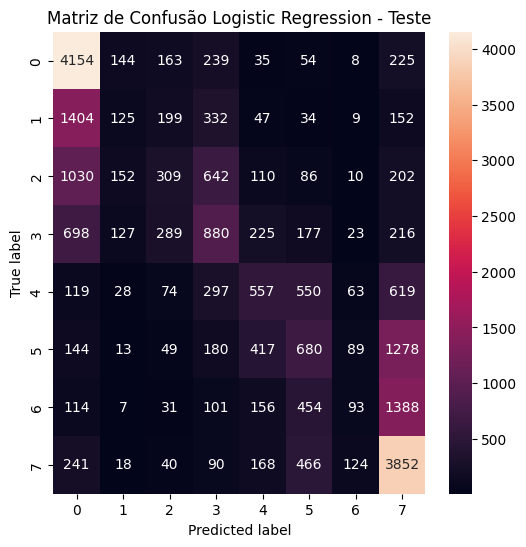

In [56]:
plotMatriz(LogReg,DocsTest,ytest,'Matriz de Confusão Logistic Regression - Teste')

--- 

## SVC

In [57]:
svc = LinearSVC(C=.1,max_iter=1000,dual=False,fit_intercept=False,penalty='l2',loss='squared_hinge',class_weight=None,random_state=18)

svc.fit(DocsValTrain, yValTrain)

print('Score treino: ', svc.score(DocsValTrain, yValTrain))
print('Score teste: ', svc.score(DocsValTest,yValTest))   

Score treino:  0.68815
Score teste:  0.4294


              precision    recall  f1-score   support

           1       0.51      0.88      0.65      1018
           2       0.33      0.06      0.09       454
           3       0.30      0.09      0.14       481
           4       0.42      0.34      0.37       539
           7       0.35      0.26      0.30       525
           8       0.28      0.24      0.26       618
           9       0.18      0.03      0.05       441
          10       0.44      0.76      0.56       924

    accuracy                           0.43      5000
   macro avg       0.35      0.33      0.30      5000
weighted avg       0.38      0.43      0.36      5000



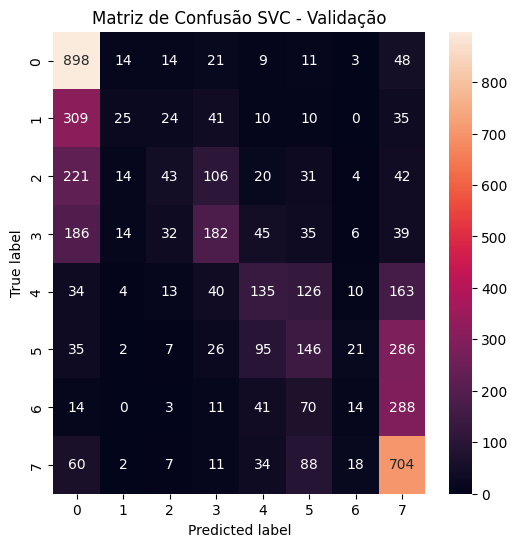

In [58]:
plotMatriz(svc,DocsValTest,yValTest,'Matriz de Confusão SVC - Validação')

In [59]:
svc.fit(DocsTrain,ytrain)
print(svc.score(DocsTrain,ytrain))
print(svc.score(DocsTest,ytest))

0.67216
0.42488


              precision    recall  f1-score   support

           1       0.50      0.86      0.63      5022
           2       0.18      0.03      0.06      2302
           3       0.26      0.09      0.13      2541
           4       0.32      0.32      0.32      2635
           7       0.32      0.22      0.26      2307
           8       0.28      0.21      0.24      2850
           9       0.22      0.03      0.06      2344
          10       0.48      0.79      0.60      4999

    accuracy                           0.42     25000
   macro avg       0.32      0.32      0.29     25000
weighted avg       0.35      0.42      0.36     25000



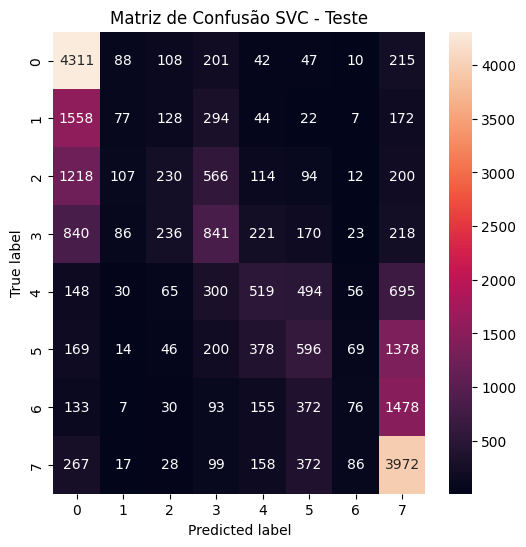

In [60]:
plotMatriz(svc,DocsTest,ytest,'Matriz de Confusão SVC - Teste')

---

## SVR

In [61]:
linearSVR =LinearSVR(C=1.0,dual=True,epsilon=0.5,loss='epsilon_insensitive',max_iter=2000,random_state=18)
linearSVR.fit(DocsValTrain,yValTrain)
print(linearSVR.score(DocsValTrain,yValTrain))
print(linearSVR.score(DocsValTest,yValTest))

0.7429096003828287
0.6261920121668754


In [62]:
linearSVR.fit(DocsTrain,ytrain)
print(linearSVR.score(DocsTrain,ytrain))
print(linearSVR.score(DocsTest,ytest))

0.7400464660597199
0.6068959589873661


---

## Linear Regression

In [63]:
linearRegression = LinearRegression(copy_X=True,fit_intercept=True,positive=False)

linearRegression.fit(DocsValTrain, yValTrain)

print('Score treino: ', linearRegression.score(DocsValTrain, yValTrain))
print('Score validação: ', linearRegression.score(DocsValTest, yValTest))

Score treino:  0.9999979233493371
Score validação:  -1.1855198980755888


In [64]:
linearRegression.fit(DocsTrain,ytrain)
print(linearRegression.score(DocsTrain,ytrain))
print(linearRegression.score(DocsTest,ytest))

0.999977534356615
-29.728947576194948


---

## Bi-Gramas

In [65]:
Docs_bg =[re.sub(r'[^a-z-A-Z\u00c0-\u00FF]+',' ',doc)for doc in DocsPorterStem]
Tfidf_bg = TfidfVectorizer(ngram_range=(1,2),min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
# Tfidf = TfidfVectorizer(min_df=10,token_pattern=r'\b\w\w+\b').fit(Docs)
X_bg = Tfidf_bg.transform(Docs_bg)

In [66]:
DocsTrain_bg, DocsTest_bg, ytrain_bg, ytest_bg = train_test_split(X_bg,y,test_size=0.50,shuffle=False,random_state=18)
DocsValTrain_bg, DocsValTest_bg, yValTrain_bg, yValTest_bg = train_test_split(DocsTrain_bg,ytrain_bg,test_size=0.2,random_state=18,shuffle=False)

---

## Logistic Regression - Bi-Gramas

In [67]:
LogReg_bg = LogisticRegression(penalty='l2',C=1,max_iter=1000,tol=0.0001,solver='lbfgs',random_state=18)
LogReg_bg.fit(DocsValTrain_bg,yValTrain_bg)
print(LogReg_bg.score(DocsValTrain_bg,yValTrain_bg))
print(LogReg_bg.score(DocsValTest_bg,yValTest_bg))

0.7428
0.4172


              precision    recall  f1-score   support

           1       0.50      0.86      0.63      1018
           2       0.18      0.03      0.05       454
           3       0.25      0.07      0.11       481
           4       0.35      0.29      0.32       539
           7       0.33      0.21      0.26       525
           8       0.29      0.24      0.27       618
           9       0.24      0.03      0.06       441
          10       0.44      0.79      0.56       924

    accuracy                           0.42      5000
   macro avg       0.32      0.32      0.28      5000
weighted avg       0.35      0.42      0.35      5000



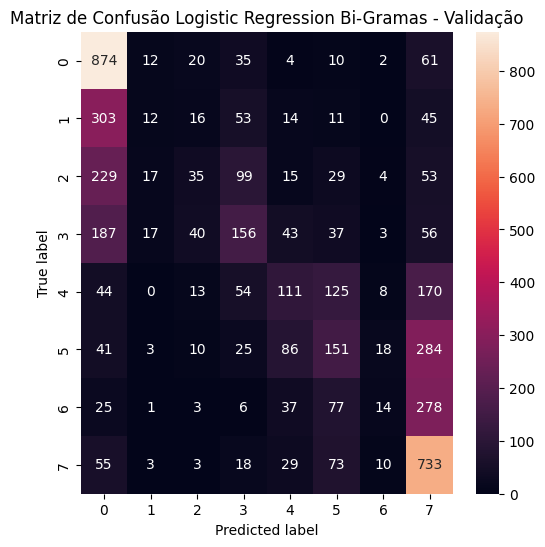

In [68]:
plotMatriz(LogReg_bg,DocsValTest_bg,yValTest_bg,'Matriz de Confusão Logistic Regression Bi-Gramas - Validação')

In [69]:
LogReg_bg.fit(DocsTrain_bg,ytrain_bg)
print(LogReg_bg.score(DocsTrain_bg,ytrain_bg))
print(LogReg_bg.score(DocsTest_bg,ytest_bg))

0.72848
0.42284


              precision    recall  f1-score   support

           1       0.50      0.85      0.63      5022
           2       0.27      0.04      0.06      2302
           3       0.29      0.10      0.15      2541
           4       0.33      0.32      0.32      2635
           7       0.31      0.21      0.25      2307
           8       0.25      0.22      0.23      2850
           9       0.22      0.02      0.04      2344
          10       0.47      0.79      0.59      4999

    accuracy                           0.42     25000
   macro avg       0.33      0.32      0.29     25000
weighted avg       0.36      0.42      0.35     25000



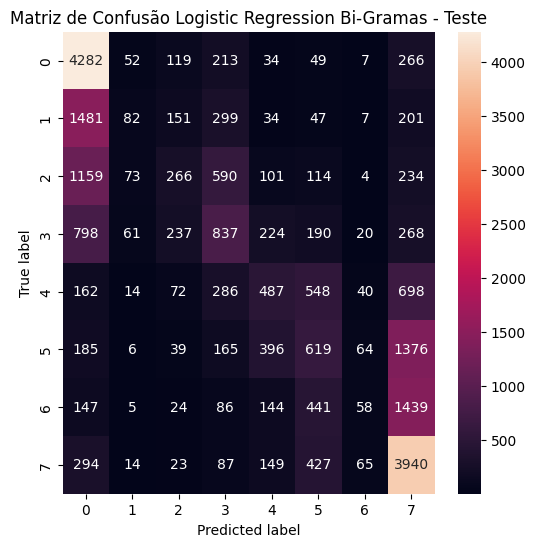

In [70]:
plotMatriz(LogReg_bg,DocsTest_bg,ytest_bg,'Matriz de Confusão Logistic Regression Bi-Gramas - Teste')

---

## SVC - Bi-Gramas

In [71]:
svc_bg = LinearSVC(C=.1,max_iter=1000,dual=False,fit_intercept=False,penalty='l2',loss='squared_hinge',class_weight=None,random_state=18)

svc_bg.fit(DocsValTrain_bg, yValTrain_bg)

print('Score treino: ', svc_bg.score(DocsValTrain_bg, yValTrain_bg))
print('Score teste: ', svc_bg.score(DocsValTest_bg,yValTest_bg))   

Score treino:  0.7318
Score teste:  0.4118


              precision    recall  f1-score   support

           1       0.48      0.89      0.62      1018
           2       0.23      0.02      0.04       454
           3       0.26      0.06      0.09       481
           4       0.36      0.27      0.31       539
           7       0.32      0.21      0.25       525
           8       0.29      0.22      0.25       618
           9       0.20      0.02      0.04       441
          10       0.42      0.78      0.55       924

    accuracy                           0.41      5000
   macro avg       0.32      0.31      0.27      5000
weighted avg       0.35      0.41      0.33      5000



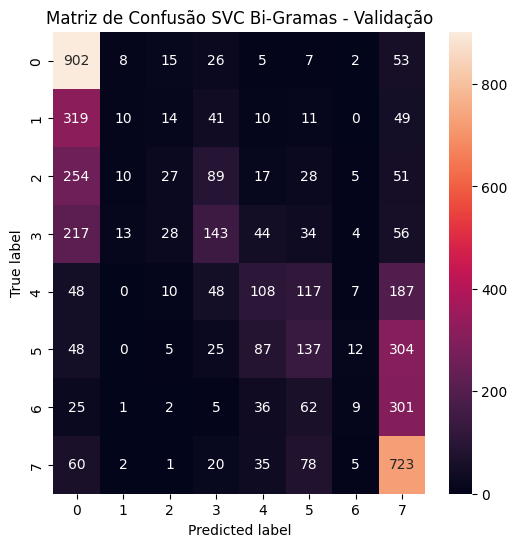

In [72]:
plotMatriz(svc_bg,DocsValTest_bg,yValTest_bg,'Matriz de Confusão SVC Bi-Gramas - Validação')

In [73]:
svc_bg.fit(DocsTrain_bg,ytrain_bg)
print(svc_bg.score(DocsTrain_bg,ytrain_bg))
print(svc_bg.score(DocsTest_bg,ytest_bg))

0.71984
0.4242


              precision    recall  f1-score   support

           1       0.48      0.87      0.62      5022
           2       0.24      0.02      0.04      2302
           3       0.29      0.08      0.13      2541
           4       0.35      0.31      0.32      2635
           7       0.30      0.20      0.24      2307
           8       0.26      0.20      0.23      2850
           9       0.26      0.02      0.04      2344
          10       0.47      0.81      0.59      4999

    accuracy                           0.42     25000
   macro avg       0.33      0.32      0.28     25000
weighted avg       0.36      0.42      0.35     25000



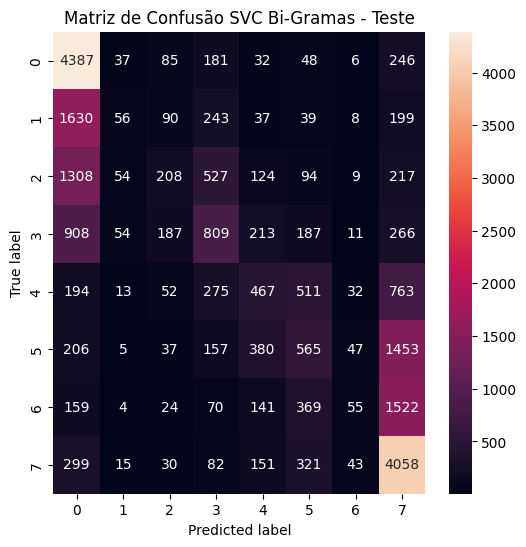

In [74]:
plotMatriz(svc_bg,DocsTest_bg,ytest_bg,'Matriz de Confusão SVC Bi-Gramas - Teste')

---

## SVR - Bi-Gramas

In [75]:
linearSVR_bg =LinearSVR(C=1.0,dual=True,epsilon=0.5,loss='epsilon_insensitive',max_iter=2000,random_state=18)
linearSVR_bg.fit(DocsValTrain_bg,yValTrain_bg)
print(linearSVR_bg.score(DocsValTrain_bg,yValTrain_bg))
print(linearSVR_bg.score(DocsValTest_bg,yValTest_bg))

0.7577099051609546
0.6056995748873883


In [76]:
linearSVR_bg.fit(DocsTrain_bg,ytrain_bg)
print(linearSVR_bg.score(DocsTrain_bg,ytrain_bg))
print(linearSVR_bg.score(DocsTest_bg,ytest_bg))

0.7579649342705433
0.6040696702053195


---

## Linear Regression - Bi-Gramas

In [77]:

linearRegression_bg = LinearRegression(copy_X=True,fit_intercept=True,positive=False)

linearRegression_bg.fit(DocsTrain_bg, ytrain_bg)

print('Score treino: ', linearRegression_bg.score(DocsTrain_bg, ytrain_bg))
print('Score teste: ', linearRegression_bg.score(DocsTest_bg, ytest_bg))


Score treino:  0.9999983355391246
Score teste:  0.4526593810850793


---

# Clustering

In [78]:
kmeans = KMeans(n_clusters=10,init='k-means++',n_init=5,max_iter=1000,tol=.00001,verbose=0,random_state=18)
kmeans = kmeans.fit(X.T,y=y)
C = kmeans.cluster_centers_
labels = kmeans.labels_

In [79]:
Xdense = X.T.toarray()
print(Xdense.shape)
print(labels.shape)
for i in range((10)):
    print(len(Xdense[labels==i]))
for i in range(10):  # Assuming n_clusters=10
    print(f"Cluster {i}: {np.sum(labels == i)} documents")

(25760, 50000)
(25760,)
25597
1
10
1
1
1
1
146
1
1
Cluster 0: 25597 documents
Cluster 1: 1 documents
Cluster 2: 10 documents
Cluster 3: 1 documents
Cluster 4: 1 documents
Cluster 5: 1 documents
Cluster 6: 1 documents
Cluster 7: 146 documents
Cluster 8: 1 documents
Cluster 9: 1 documents


In [80]:
# # Range of clusters to test
# inertia = []
# k_values = range(2, 21)

# for k in k_values:
#     kmeans = KMeans(n_clusters=k, init='k-means++', n_init=5, max_iter=500, random_state=18)
#     kmeans.fit(X)
#     inertia.append(kmeans.inertia_)

# # Plot the Elbow curve
# plt.figure(figsize=(8, 5))
# plt.plot(k_values, inertia, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.title('Elbow Method for Optimal k')
# plt.show()

In [81]:
# from sklearn.metrics import silhouette_score

# silhouette_scores = []

# for k in range(2, 21):
#     kmeans = KMeans(n_clusters=k, init='k-means++', n_init=5, max_iter=500, random_state=18)
#     kmeans.fit(X)
#     score = silhouette_score(X, kmeans.labels_)
#     silhouette_scores.append(score)

# # Plot Silhouette Scores
# plt.figure(figsize=(8, 5))
# plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='--')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Method for Optimal k')
# plt.show()


In [84]:
kmeans = KMeans(n_clusters=20,init='k-means++',n_init=5,max_iter=1000,tol=1,verbose=0,random_state=18)
kmeans = kmeans.fit(X.T,y=y)
C = kmeans.cluster_centers_
labels = kmeans.labels_

In [85]:
Xdense = X.T.toarray()
print(X.shape)
print(labels.shape)
for i in range((20)):
    print(len(Xdense[labels==i]))


(50000, 25760)
(25760,)
1
516
1
1
79
1
1
3
1
1
25122
2
2
1
1
1
7
17
1
1
